In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
upladed = files.upload()

Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv


In [ ]:
df = pd.read_csv('rainfall in india 1901-2015.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [ ]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [ ]:
subdivs = df['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
subdivs

Total # of Subdivs: 36


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [ ]:
df.dropna(how='any', inplace=True)

Max: 348.5675046813728 ocurred in ['JUL']
Max: 19.111370590830433 ocurred in ['JAN']
Mean: 118.95843815772808


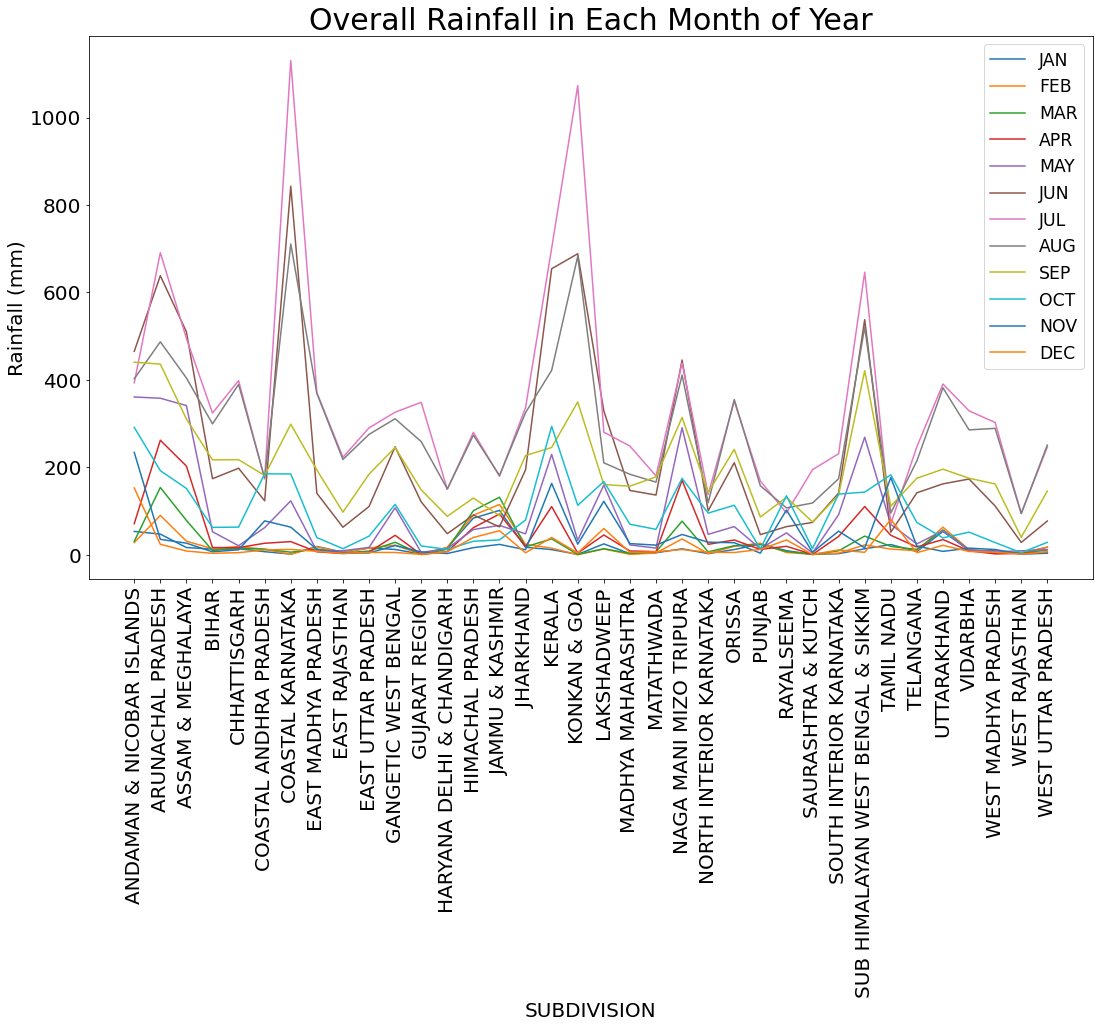

In [ ]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = df['SUBDIVISION'].unique()
xlbls.sort()
dfg = df.groupby('SUBDIVISION').mean()[months]
dfg.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

dfg = dfg.mean(axis=0)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

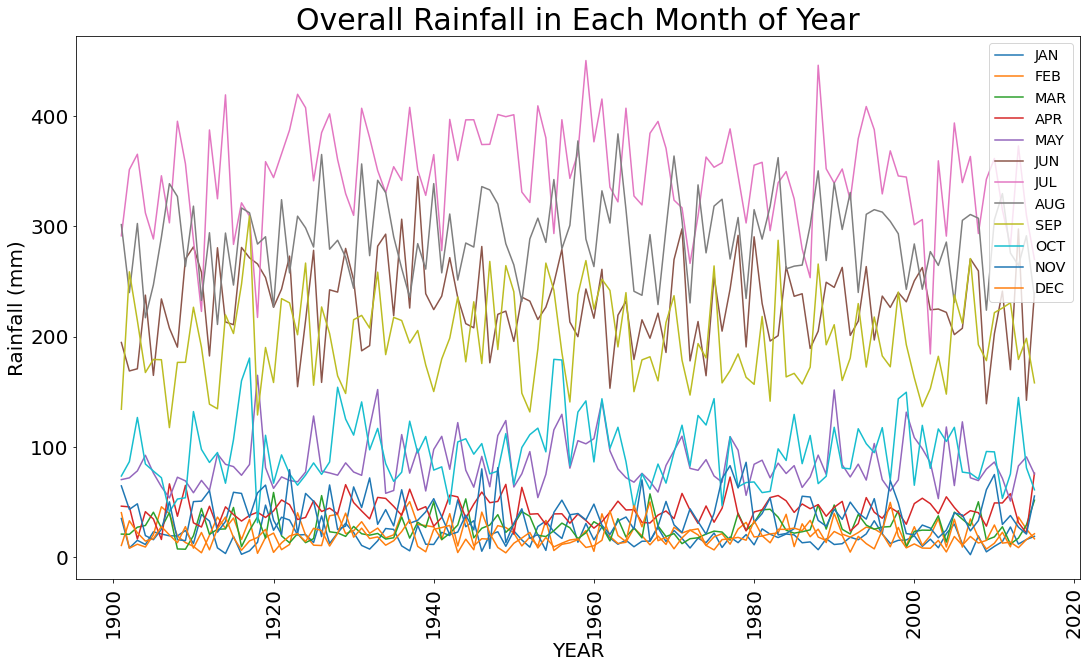

In [ ]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

MAD (Training Data): 93.27543606567792
MAD (Test Data): 94.80209350578838


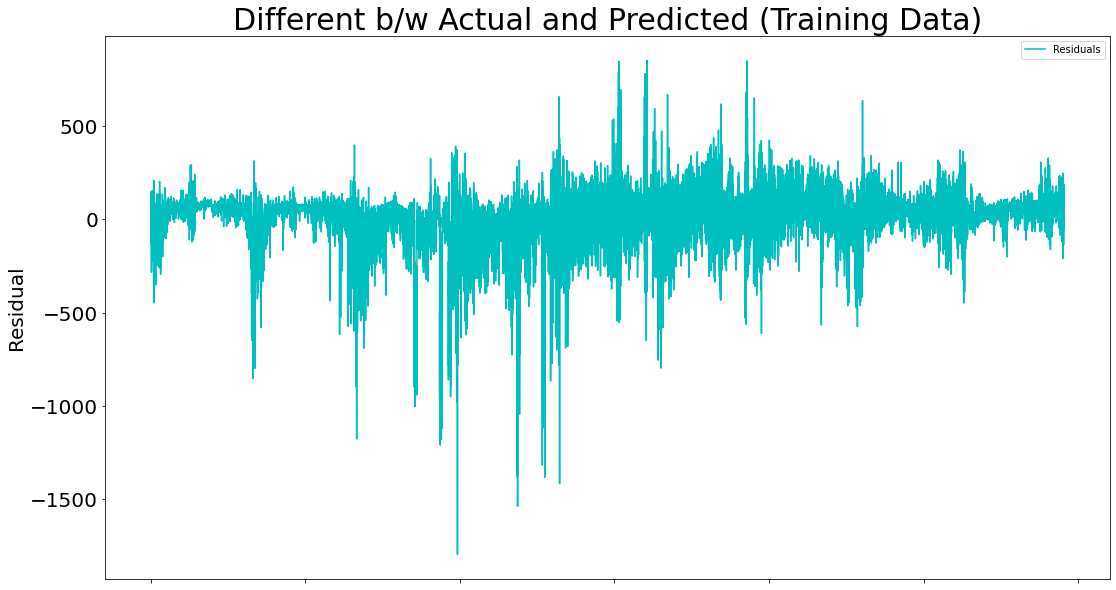

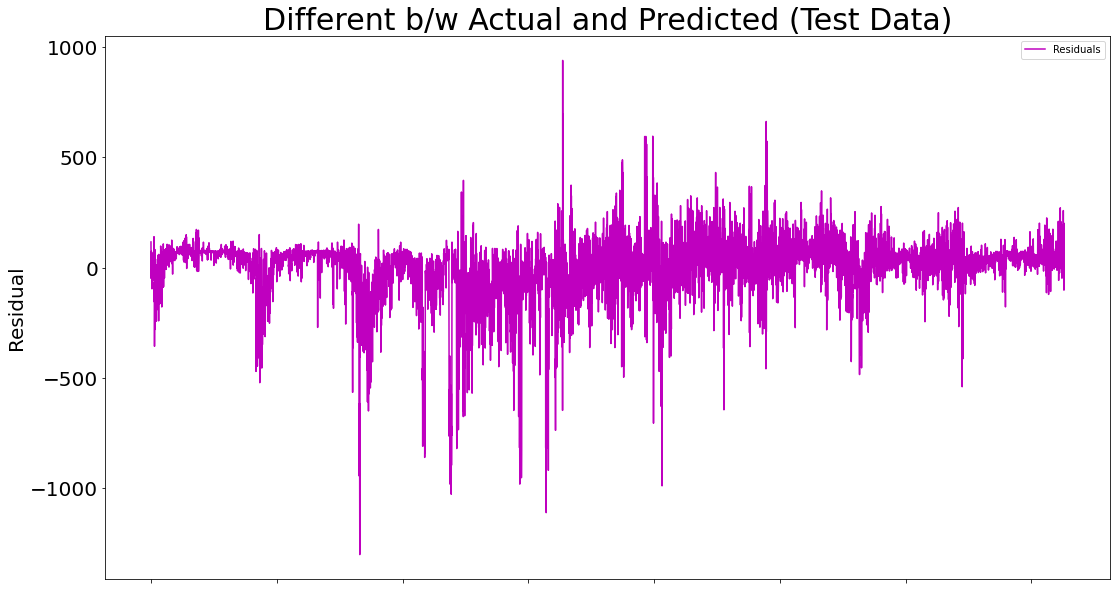

In [ ]:
df2 = df[['SUBDIVISION',months[0],months[1],months[2],months[3]]]
#df2 = df['YEAR','JAN','FEB','MAR','APR']
df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = df[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
    
#df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)

df2.drop('SUBDIVISION', axis=1,inplace=True)
#print(df2.info())
msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Training Data)', color = 'c', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Test Data)', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bcd21d850>,
      dtype=object)

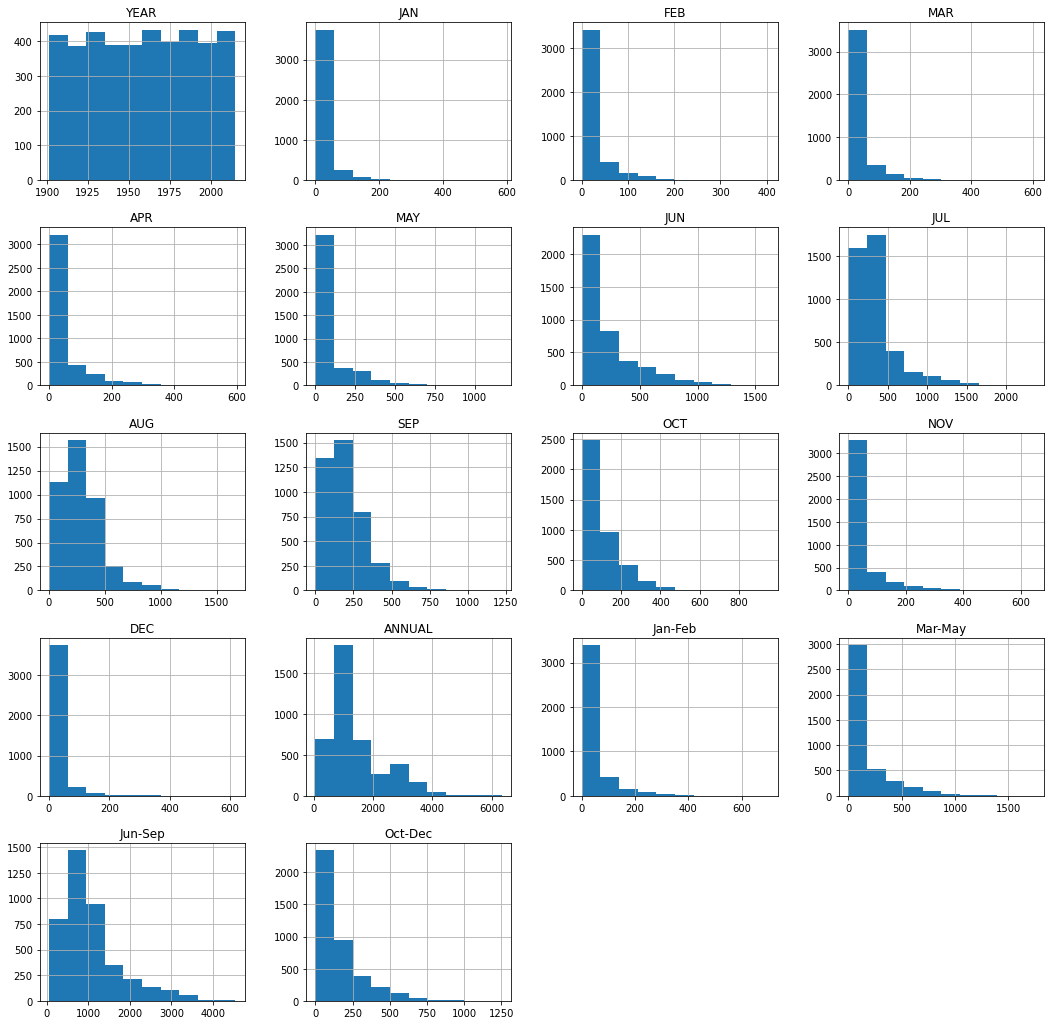

In [ ]:
df.hist(figsize=(18,18))